In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Lets load the Boston House Price Dataset

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston=load_boston()

c:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np

        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California hou

In [4]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename', 'data_module'])

## Lets check of description of the datasets

In [5]:
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

##  Preparing Datasets

In [6]:
dataset=pd.DataFrame(boston.data,columns=boston.feature_names)

In [7]:
dataset

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0.0,0.573,6.593,69.1,2.4786,1.0,273.0,21.0,391.99,9.67
502,0.04527,0.0,11.93,0.0,0.573,6.120,76.7,2.2875,1.0,273.0,21.0,396.90,9.08
503,0.06076,0.0,11.93,0.0,0.573,6.976,91.0,2.1675,1.0,273.0,21.0,396.90,5.64
504,0.10959,0.0,11.93,0.0,0.573,6.794,89.3,2.3889,1.0,273.0,21.0,393.45,6.48


In [8]:
dataset["Price"]=boston.target

In [9]:
dataset.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


In [10]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  Price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [11]:
dataset.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,Price
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


In [12]:
dataset.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
Price      0
dtype: int64

## EDA

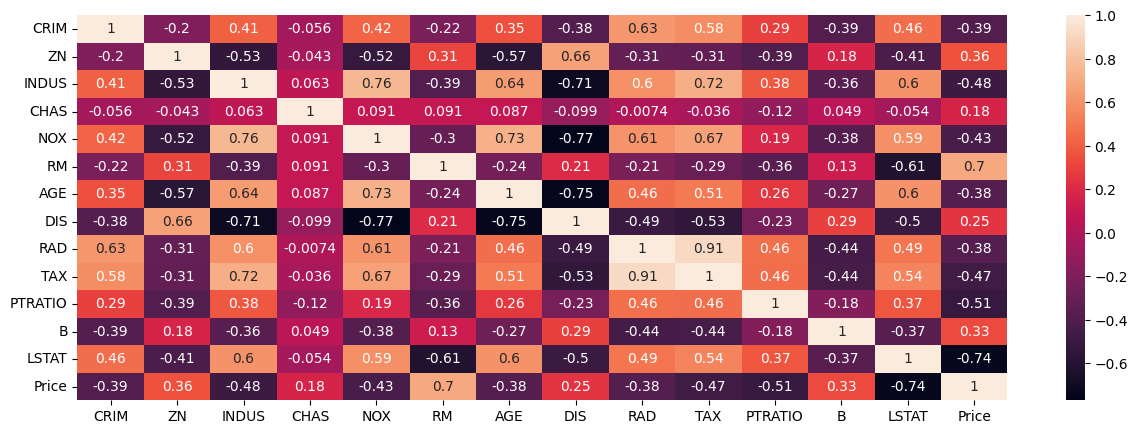

In [13]:
# By deafult this correraton used pearson correlation which value is ranges btw -1 to +1
plt.figure(figsize=(15,5))
sns.heatmap(dataset.corr(),annot=True)
plt.show()

In [14]:
# import seaborn as sns
# sns.pairplot(dataset)

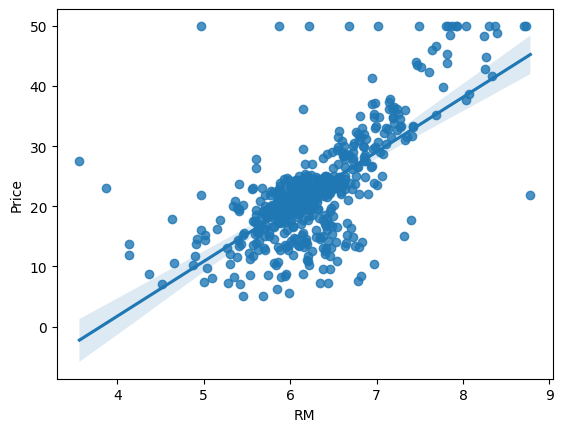

In [15]:
sns.regplot(x="RM",y="Price",data=dataset)
plt.show()

In [17]:
x=dataset.iloc[:,:-1]
y=dataset.iloc[:,-1]

In [18]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3, random_state=42)

In [19]:
# why we use standardScaler in leniar regression
# Because internally we use grediant descent and our aim to reach global minima and to come on that we have to make sure that 
# all our independent feature unit should be in the same scale so that convergence will happen so quickly

In [20]:
from sklearn.preprocessing import StandardScaler

In [21]:
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [27]:
import pickle
pickle.dump(sc,open("scaling.pkl",'wb'))

In [24]:
from sklearn.linear_model import LinearRegression

In [184]:
model=LinearRegression()
model.fit(x_train,y_train)


LinearRegression()

In [185]:
model.coef_

array([-1.10834602,  0.80843998,  0.34313466,  0.81386426, -1.79804295,
        2.913858  , -0.29893918, -2.94251148,  2.09419303, -1.44706731,
       -2.05232232,  1.02375187, -3.88579002])

In [186]:
model.intercept_

23.01581920903956

In [187]:
# to see on which parameter the model is trained
model.get_params()

{'copy_X': True,
 'fit_intercept': True,
 'n_jobs': None,
 'normalize': 'deprecated',
 'positive': False}

In [188]:
x_test_predict=model.predict(x_test)

In [189]:
x_test_predict

array([28.64896005, 36.49501384, 15.4111932 , 25.40321303, 18.85527988,
       23.14668944, 17.3921241 , 14.07859899, 23.03692679, 20.59943345,
       24.82286159, 18.53057049, -6.86543527, 21.80172334, 19.22571177,
       26.19191985, 20.27733882,  5.61596432, 40.44887974, 17.57695918,
       27.44319095, 30.1715964 , 10.94055823, 24.02083139, 18.07693812,
       15.934748  , 23.12614028, 14.56052142, 22.33482544, 19.3257627 ,
       22.16564973, 25.19476081, 25.31372473, 18.51345025, 16.6223286 ,
       17.50268505, 30.94992991, 20.19201752, 23.90440431, 24.86975466,
       13.93767876, 31.82504715, 42.56978796, 17.62323805, 27.01963242,
       17.19006621, 13.80594006, 26.10356557, 20.31516118, 30.08649576,
       21.3124053 , 34.15739602, 15.60444981, 26.11247588, 39.31613646,
       22.99282065, 18.95764781, 33.05555669, 24.85114223, 12.91729352,
       22.68101452, 30.80336295, 31.63522027, 16.29833689, 21.07379993,
       16.57699669, 20.36362023, 26.15615896, 31.06833034, 11.98

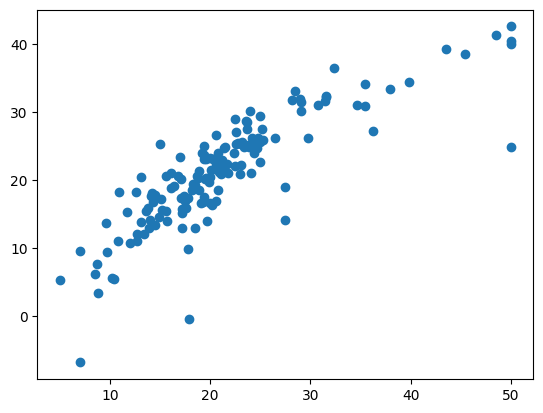

In [192]:
## plot scatter plot for the prediction
plt.scatter(y_test,x_test_predict)
plt.show()

In [194]:
# Residual is the errors
residual=(y_test-x_test_predict)
residual

173   -5.048960
274   -4.095014
491   -1.811193
72    -2.603213
452   -2.755280
         ...   
441   -0.303672
23     1.114059
225   10.016575
433   -2.382863
447   -5.685618
Name: Price, Length: 152, dtype: float64

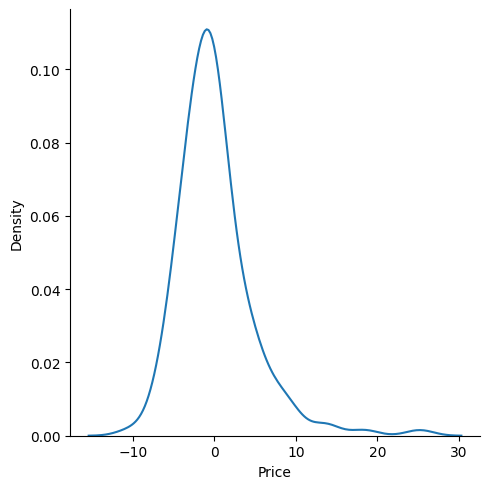

In [196]:
# plot the residual
sns.displot(residual,kind="kde")
plt.show()

In [201]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
print(mean_absolute_error(y_test,x_test_predict))
print(mean_squared_error(y_test,x_test_predict))
print(np.sqrt(mean_squared_error(y_test,x_test_predict)))

3.1627098714574053
21.517444231177215
4.638689926172821


# R square and Adjusted R square

### formula
## R^2=1-SSR/SSt
### R^2 = cofficient of detemination SSR = Sum of square of residuals SST =total sum of squares

In [203]:
from sklearn.metrics import r2_score
score=r2_score(y_test,x_test_predict)
print(score)

0.7112260057484932


## Adusted R^2 = 1-[(1-R^2)*(n-1)/(n-k-1)]
#### Adysted R^2 is always less then R^2
##### where :
##### R2 : The R2 of the model ,  n: The number of observation, k: the number of predictor

In [204]:
# display adjusted r2
1-(1-score)*(len(y_test)-1)/(len(y_test)-x_test.shape[1]-1)

0.6840226584639308

# New Data Prediction

In [209]:
# here we can get bulk data or single data 
# for bulk data we use model.predict as previous 
# for single data  we have to give in one row and column is -1 for upto what extent values is present  coloum as our model is trained in the same way
boston.data[0].reshape(1,-1).shape

(1, 13)

In [225]:
# first scale as before
values=sc.transform (boston.data[0].reshape(1,-1))
# now predict scaled data
model.predict(values)

C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])

In [227]:
# inreal
boston.target[0]

24.0

# Pickle The Model file for Deployment

In [228]:
import pickle

In [230]:
# we have made pickle where we dump our trained model here our regresssion model name is  model and i will make a file with
# the name of Reg-modle.pkl and wb is writebite mode in which it should be open 
pickle.dump(model,open("Reg_model.pkl",'wb'))

In [233]:
# pickle file  can aslo be load with pickle library for prediction here rb is readbite mode as load in read bite mode 
pickled_model=pickle.load(open("Reg_model.pkl",'rb'))

In [235]:
# shape rows and column should be same format as it is during trained
values=sc.transform (boston.data[0].reshape(1,-1))
pickled_model.predict(values)

C:\Users\chemi\Desktop\enviroments\myml\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([30.08649576])